Ticket 1.2.1:  
This notebook is used to deeply investigate missing values and determine missing value handling strategies

### Numerical data
- consturction_year
    - 34.8% of records have zero value
    1. replace with mean value excluding the consturction_year == 0
- logitute, latitude
    - 3% of records has wrong longitude and latitude. The value seems to be wrong when the district locates across multiple regions.  
    https://en.wikipedia.org/wiki/Regions_of_Tanzania  
    https://en.wikipedia.org/wiki/Districts_of_Tanzania
    1. eliminate those records
    2. leave it as it is 
    3. replace values according to the region and district by searching wikipedia


### Categorical data
- strategy 1:
    - replace NaN value with "unknown"
- strategy 2:
    - replce NaN value and "unknown" value with most frequenct value

        - funder: NaN value (6%), 4 "unknown" value
        - installer: NaN value (6%), 4 "unknown" value
        - wtp_name: NaN value (0.03%), 3 "unknown" value
        - subvillage: NaN value (6%)
        - public_meeting: NaN value (6%)
        - scheme_management: NaN value(6%)
        - **scheme_name: NaN value (48%)**
        - permit: NaN value (5%)
        - water_quality: soft(85%), salty(8%), unknown(3%), milky(1%)
        - quantity: enough(55%), insufficient(25%), dry(10%), seasonal(6%), unknown(1%)
        - source: spring(28%), shallow well(28%), machine dbh(18%), river(16%), rainwater harvesting (3%), lake(1%), dam(1%), other(0.3%), unknown(0.1%)

### Messing value handling scheme  
The following is how to deal with missing values after investigating data.  
**Categorical Data**
- replace NaN value with "unknown"  

**Numerical data**
- replace zero value in construction_year with mean value
- eliminate records having wrong longitude and latitude

# Simulation

In [1]:
import pandas as pd
import matplotlib as plt

In [2]:
pd.set_option('display.max_columns', None) # show full dataframe

In [3]:
# import data
train_val = pd.read_csv("../data/training_set_values.csv")
train_label = pd.read_csv("../data/training_set_labels.csv")

In [5]:
# merge train_set_values and train_set_labels on ID
train_data = pd.merge(train_val, train_label, on="id")

# convert data type of "date_recorded" into datetime object since we can't see the timeline with string 
train_data["date_recorded"] = pd.to_datetime(train_data['date_recorded'])
type(train_data["date_recorded"][0])

train_data

C:\Users\Owner\AppData\Local\Temp\ipykernel_12484\4014035291.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  train_data["date_recorded"] = pd.to_datetime(train_data['date_recorded'])


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [6]:
# extract year from date_recorded
train_data["year_recorded"] = pd.DatetimeIndex(train_data["date_recorded"]).year
train_data["diff_year"] = train_data["year_recorded"] - train_data["construction_year"]
train_data.loc[train_data["diff_year"]<0]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,year_recorded,diff_year
8729,20198,0.0,2004-05-01,Government Of Tanzania,86,DWE,38.959776,-5.247278,Kwa Bi Shoga,0,Pangani,Mapojoni Kati,Tanga,4,4,Muheza,Ngomeni,120,True,GeoData Consultants Ltd,VWC,Borehole,True,2008,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,salty abandoned,salty,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional,2004,-4
10441,55069,20.0,2004-12-01,Plan Int,307,DDCA,38.768656,-7.298419,Mianzi Primary School,0,Rufiji,Momboni,Pwani,60,33,Kisarawe,Msanga,1,True,GeoData Consultants Ltd,VWC,NaN,False,2006,india mark iii,india mark iii,handpump,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,hand pump,hand pump,non functional,2004,-2
13366,48759,100.0,2004-06-01,Mgaya,1331,Mgaya,34.290885,-1.699609,Maro Mgaya,0,Lake Victoria,Kibaoni,Mara,20,2,Serengeti,Kenyamonta,80,NaN,GeoData Consultants Ltd,Other,NaN,True,2011,other - rope pump,rope pump,rope pump,other,other,pay per bucket,per bucket,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional,2004,-7
23373,20534,50.0,2004-03-01,Tasaf And Lga,239,TASAFcitizen and LGA,39.272736,-11.019000,Juhudi,0,Ruvuma / Southern Coast,Mwanona,Mtwara,90,33,Newala,Luchingu,317,True,GeoData Consultants Ltd,VWC,Mwanona,False,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe multiple,communal standpipe,functional,2004,-5
27501,53086,500.0,2004-01-07,Kkkt,1611,Villagers,34.900561,-8.873813,Kwa Barnabasi Kilumile,0,Rufiji,Mlowa,Iringa,11,4,Njombe,Makambako,65,True,GeoData Consultants Ltd,VWC,NaN,False,2009,nira/tanira,nira/tanira,handpump,vwc,user-group,pay when scheme fails,on failure,soft,good,enough,enough,hand dtw,borehole,groundwater,hand pump,hand pump,functional,2004,-5
32619,9195,0.0,2004-03-01,Caltus,1856,Cultus,31.539761,-7.983106,Kwa Pambajila,0,Lake Tanganyika,Magomeni,Rukwa,15,4,Sumbawanga Urban,Kasense,900,True,GeoData Consultants Ltd,VWC,Mradi wa maji wa kasen,True,2005,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,dry,dry,spring,spring,groundwater,communal standpipe,communal standpipe,non functional,2004,-1
33942,5971,0.0,2004-03-01,Amref,-27,AMREF,39.283105,-7.422852,Kwa Ndevu,0,Rufiji,Gundani,Pwani,6,4,Mkuranga,Magawa,200,True,GeoData Consultants Ltd,VWC,NaN,False,2007,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,seasonal,seasonal,shallow well,shallow well,groundwater,hand pump,hand pump,non functional,2004,-3
39559,15921,0.0,2004-03-06,Tasafu,301,DWE,38.558421,-5.140405,Shuleni,0,Pangani,Kiwanjani,Tanga,4,2,Korogwe,Kwagunda,713,True,GeoData Consultants Ltd,VWC,NaN,False,2009,other,other,other,vwc,user-group,never pay,never pay,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other,non functional,2004,-5
48555,1251,0.0,2004-12-01,African 2000 Network,284,Karugendo,38.929212,-7.111349,Kauzeni Primary School 2,0,Wami / Ruvu,Kauzeni Chini,Pwani,60,33,Kisarawe,Kibuta,185,True,GeoData Consultants Ltd,Private operator,NaN,False,2008,gravity,gravity,gravity,private operator,commercial,never pay,never pay,soft,good,enough,enough,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2004,-4


In [12]:
cleaned_df = train_data[(train_data["diff_year"] >= 0) & 
                         (train_data["construction_year"]!=0)]
len(cleaned_df)

38682

In [23]:
features = ["source", "management", "quality_group", "payment",
            "region", "payment_type", "quantity_group",
            "construction_year", "gps_height", "population", "status_group"]

In [24]:
cleaned_df = cleaned_df[features]

In [25]:
import numpy as np
# Missing values are NaN (e.g. null) or zero value or unknown
# So, find the missing values

columns_null = []
columns_zero = []
columns_unknown = []


for col in cleaned_df.columns:

    # search columns which contain null
    if cleaned_df[col].isna().any() == True:
        columns_null.append(col)
        
    # search columns which contain zero
    elif 0 in cleaned_df[col].unique():
        columns_zero.append(col)

    # search columns which contain unknown
    elif "unknown" in cleaned_df[col].unique():
        columns_unknown.append(col)
        
    elif "Unknown" in cleaned_df[col].unique():
        columns_unknown.append(col)


# count the number of rows containing null and create a data frame
null_data = pd.DataFrame(cleaned_df[columns_null].isna().sum()).reset_index()
null_data.columns = ["col_name", "num_of_null"]
null_data["percent_of_null"] = null_data["num_of_null"] / len(cleaned_df)*100

# count the number of rows containing zero and create a data frame
zero_data = pd.DataFrame(cleaned_df[columns_zero].isin([0]).sum()).reset_index()
zero_data.columns = ["col_name", "num_of_zero"]
zero_data["percent_of_zero"] = zero_data["num_of_zero"] / len(cleaned_df)*100

# count the number of rows containing unknown and create a data frame
unknown_data = pd.DataFrame(cleaned_df[columns_unknown].isin(["unknown", "Unknown"]).sum()).reset_index()
unknown_data.columns = ["col_name", "num_of_unknown"]
unknown_data["percent_of_unknown"] = unknown_data["num_of_unknown"] / len(cleaned_df) * 100

# merging all dataframes
missing_value = pd.merge(null_data, zero_data, how="outer", sort=True)
missing_value = pd.merge(missing_value, unknown_data, how="outer", sort=True)
missing_value = missing_value.replace(np.nan, 0)

# counts sum of missing values and calculate percentage
missing_value["sum_of_missing_value"] = missing_value["num_of_null"] + missing_value["num_of_zero"] + missing_value["num_of_unknown"]
missing_value["percent_of_missing_value"] = missing_value["sum_of_missing_value"] / len(cleaned_df) * 100 
missing_value

,col_name,num_of_null,percent_of_null,num_of_zero,percent_of_zero,num_of_unknown,percent_of_unknown,sum_of_missing_value,percent_of_missing_value
0,gps_height,0.0,0.0,763.0,1.972494,0.0,0.000000,763.0,1.972494
1,management,0.0,0.0,0.0,0.000000,354.0,0.915154,354.0,0.915154
2,payment,0.0,0.0,0.0,0.000000,5086.0,13.148234,5086.0,13.148234
3,payment_type,0.0,0.0,0.0,0.000000,5086.0,13.148234,5086.0,13.148234
4,population,0.0,0.0,1347.0,3.482240,0.0,0.000000,1347.0,3.482240
5,quality_group,0.0,0.0,0.0,0.000000,1188.0,3.071196,1188.0,3.071196
6,quantity_group,0.0,0.0,0.0,0.000000,515.0,1.331369,515.0,1.331369
7,source,0.0,0.0,0.0,0.000000,30.0,0.077555,30.0,0.077555


In [24]:
# find missing values
print("These columns have NaN value:")
for col in train_val.columns:
    if True in train_val[col].isnull().unique():
        print(col)

These columns have NaN value:
funder
installer
wpt_name
subvillage
public_meeting
scheme_management
scheme_name
permit


In [25]:
# calculate percentage of nan value per column
col_name = "permit"
df = pd.DataFrame(train_val[col_name].isnull().value_counts())
df["percent"] = df["count"] / len(train_val)*100
df

,count,percent
permit,,
False,56344,94.855219
True,3056,5.144781


In [26]:
# find zero value
print("These columns have 'zero' value:")
for col in train_val.columns:
    if 0 in train_val[col].unique():
        print(col)
    

These columns have 'zero' value:
id
amount_tsh
gps_height
longitude
num_private
district_code
population
public_meeting
permit
construction_year


In [27]:
# find "unknown" values
print("These columns have 'unknown' value:")
for col in train_val.columns:
    if "unknown" in train_val[col].unique():
        print(col)
    elif "Unknown" in train_val[col].unique():
        print(col)

These columns have 'unknown' value:
funder
installer
wpt_name
management
management_group
payment
payment_type
water_quality
quality_group
quantity
quantity_group
source
source_class


<Axes: xlabel='payment'>

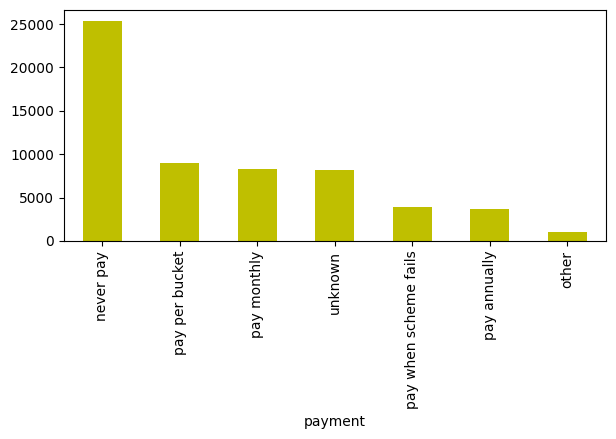

In [28]:
train_val["payment"].value_counts().plot(kind="bar", figsize=[7,3], color="y")

<Axes: xlabel='payment_type'>

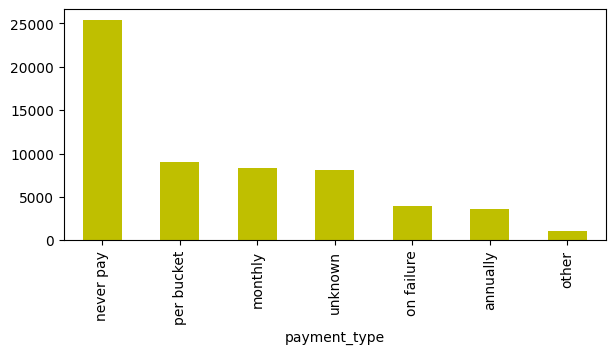

In [29]:
train_val["payment_type"].value_counts().plot(kind="bar", figsize=[7,3], color="y")

<Axes: xlabel='water_quality'>

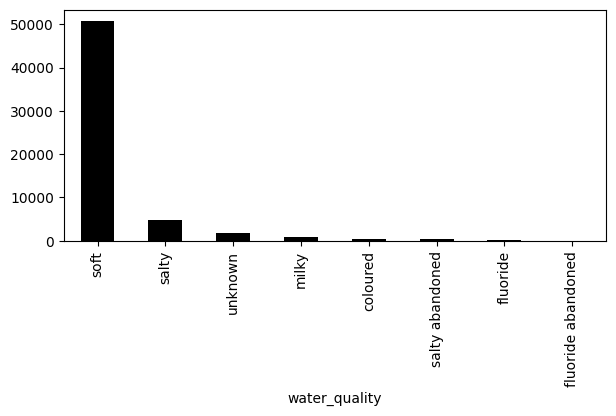

In [30]:
train_val["water_quality"].value_counts().plot(kind="bar", figsize=[7,3], color="k")

<Axes: xlabel='quality_group'>

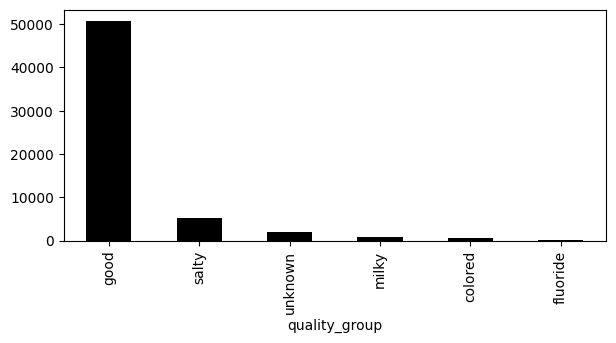

In [31]:
train_val["quality_group"].value_counts().plot(kind="bar", figsize=[7,3], color="k")

<Axes: xlabel='quantity'>

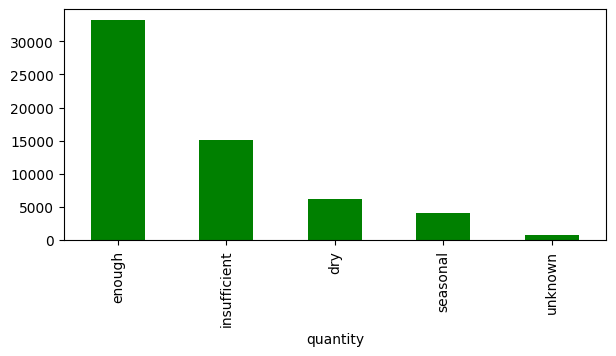

In [32]:
train_val["quantity"].value_counts().plot(kind="bar", figsize=[7,3], color="g")

<Axes: xlabel='quantity_group'>

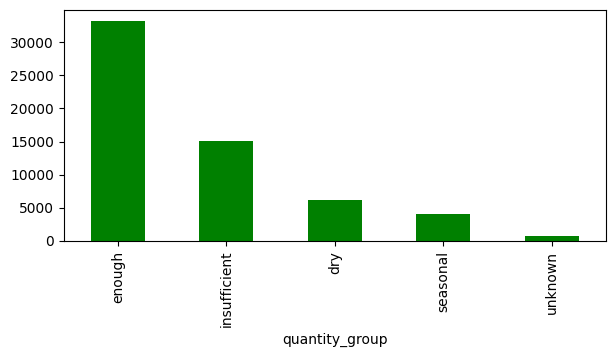

In [33]:
train_val["quantity_group"].value_counts().plot(kind="bar", figsize=[7,3], color="g")


<Axes: xlabel='source'>

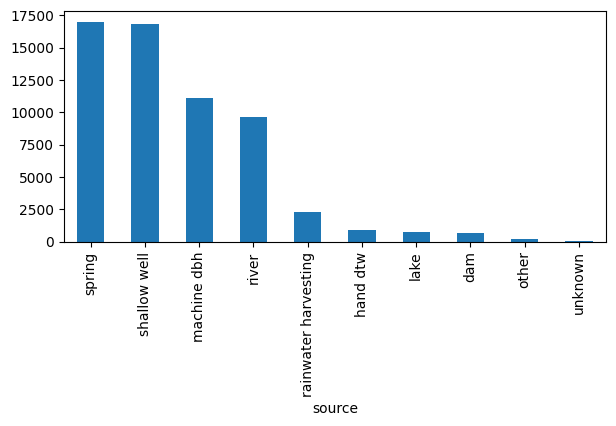

In [34]:
train_val["source"].value_counts().plot(kind="bar", figsize=[7,3])


<Axes: xlabel='source_class'>

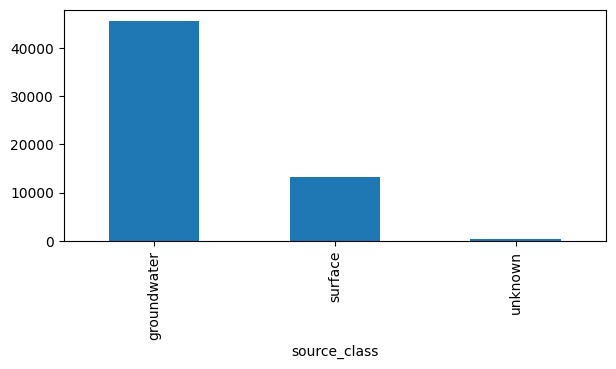

In [35]:
train_val["source_class"].value_counts().plot(kind="bar", figsize=[7,3])

In [36]:
train_val

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,14/03/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,06/03/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,25/02/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,28/01/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,13/07/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,03/05/2013,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,07/05/2011,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,11/04/2011,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,08/03/2011,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [37]:
train_val.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [38]:
train_val.select_dtypes(include=['object']).columns

Index(['date_recorded', 'funder', 'installer', 'wpt_name', 'basin',
       'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [39]:
import sys
sys.path.insert(0, '../src')

from data_cleaning import DataCleaning

df_test = train_val
categorical_columns = train_val.select_dtypes(include=['object']).columns

clean = DataCleaning(df=df_test,
                        categorical_columns=categorical_columns,
                        construction_year_impute_method="mean",
                        geo_coordinate_impute_method="drop")
cleaned_df = clean.impute()

cleaned_df


TypeError: DataCleaning.__init__() got an unexpected keyword argument 'df'